<a href="https://colab.research.google.com/github/daeber1166/proyectoMoA/blob/main/cancer_participacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn  as sns
import matplotlib.pyplot as plt
import math
import sklearn
assert sklearn.__version__ >= "0.20"

# <a id='1'>1.IMPORTACION DE DATOS CANCER </a>

Estos datos son de una base de datos del cancer de mama en wisconsin, para obtencion de estos dato se tienen  característicasque  se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria el objetivo esta en detectar si esta es maligna o beninga(masa similar a la cancerigena que no crece ni muta y por ende no es mortal).


 Describen las características de los núcleos celulares presentes en la imagen

radio (media de las distancias desde el centro hasta los puntos del perímetro)

textura (desviación estándar de los valores de escala de grises)

perímetro

zona

suavidad (variación local en longitudes de radio)

compacidad (perímetro ^ 2 / área - 1.0)

concavidad (gravedad de las porciones cóncavas del contorno)

puntos cóncavos (número de porciones cóncavas del contorno)

simetría

dimensión fractal ("aproximación de la línea costera" - 1)

 y la clase:
 WDBC-Maligno

WDBC-Benigno

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer= load_breast_cancer()

df=pd.DataFrame(cancer.data)#hace un data frame con los datos para que no salga sin organizacion
df.columns=cancer.feature_names #le asignamos a la tabla las caracteristicas
df['target']=cancer.target

NOTA: sklearn ya entrega el dataset ya escalado y categorizado por ejemplo el target corresponde a dos tipos beningno y maligno como se puede observar en la vszualizacion del target podemos ver que a este le corresponde un 0 y un 1 y no una B Y un M como inicialmente propone sklearn.

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
h=pd.DataFrame(cancer.target)
h.head()

,0
0,0
1,0
2,0
3,0
4,0


In [6]:
df.info()#para observar con que clase de variable contamos y su typo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.isnull().sum()#no hya elemento en nulo sklearn entrega datasets muy trabajables

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# <a id='1'>2. ANALISIS DE DATOS</a>

podemos ver que hay una predominancia  de una de las clases de tumores como se observa en eldiagrama de barras.

target
0    212
1    357
dtype: int64


Text(0.5, 1.0, 'DIFERENCIA ENTRE LAS CLASES DE TUMORES')

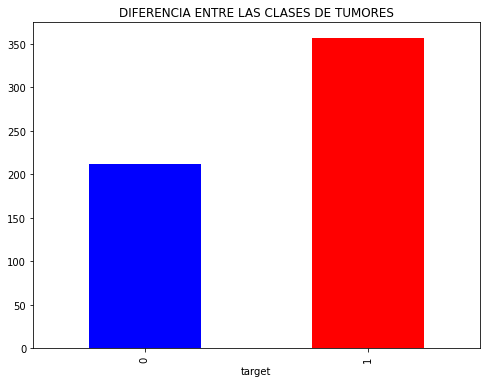

In [14]:
print(df.groupby('target').size())
df.groupby('target')['target'].count().plot(figsize=(8,6),kind='bar',color=['b','r'])
plt.title('DIFERENCIA ENTRE LAS CLASES DE TUMORES')

podemos observar que la mayoria de los promedios genernan una canpana de gauss lo cual es bueno para esta investigacion y se observa que las variables denominadas worst para definir algo negativo para quienes posean cancer de mama, estan ubicados en su mayoria hacia un lado de la grafica esto nos dice que los datos podrian quedar mal balanceados  y esto podria conllevar a un mayor error a la hora de testear.

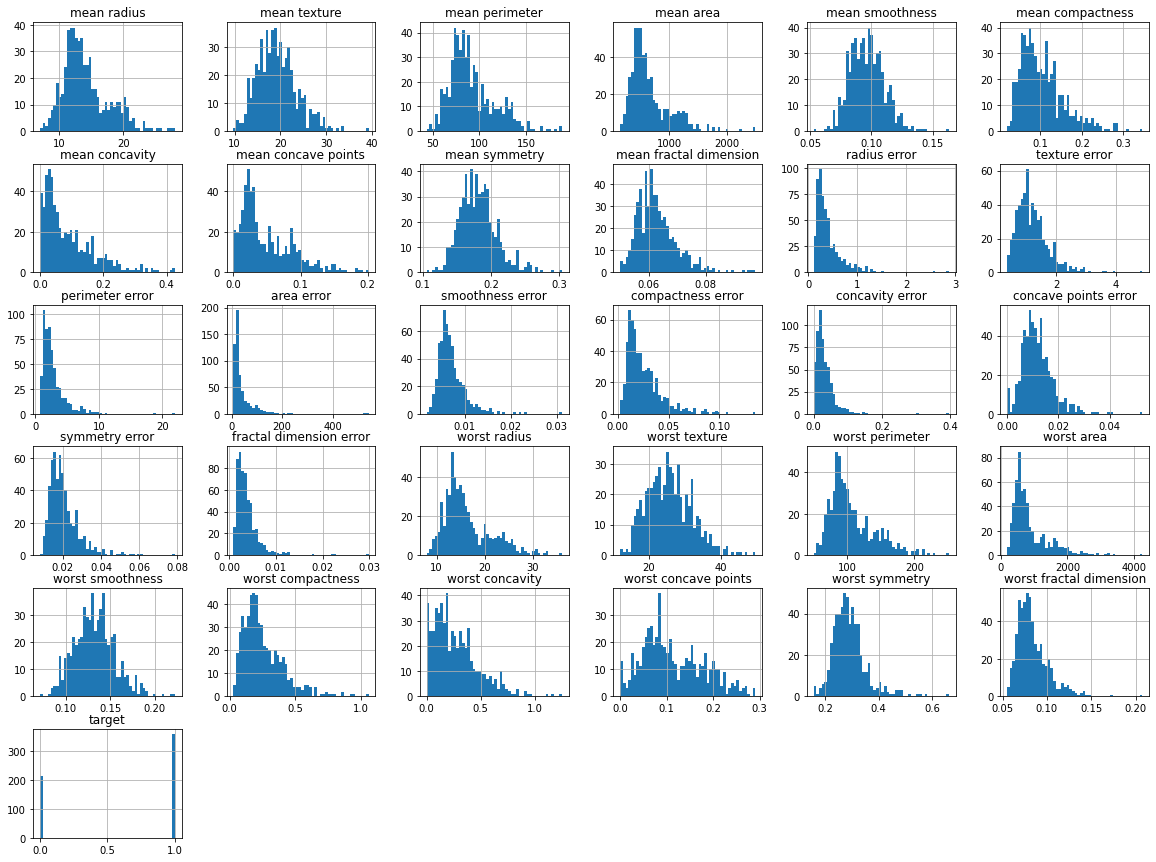

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# <a id='1'>3.CORRELACION </a>

In [17]:
df_corr=df.corr(method='spearman')

hay buena correlacion esto contribuira a una buena prediccion ya que los datos aparentan seguir un patron  a la hora de poseer un cancer. 

In [18]:
df_corr["target"].sort_values(ascending=False)

target                     1.000000
symmetry error             0.092303
smoothness error           0.052193
mean fractal dimension     0.025903
texture error             -0.019419
fractal dimension error   -0.201492
worst fractal dimension   -0.311477
mean symmetry             -0.332567
mean smoothness           -0.371892
compactness error         -0.380666
worst symmetry            -0.396843
worst smoothness          -0.425513
mean texture              -0.461971
concavity error           -0.470338
worst texture             -0.476720
concave points error      -0.488717
worst compactness         -0.606810
mean compactness          -0.609288
radius error              -0.616912
perimeter error           -0.630411
worst concavity           -0.705734
area error                -0.714184
mean radius               -0.732785
mean concavity            -0.733308
mean area                 -0.734122
mean perimeter            -0.748496
mean concave points       -0.777877
worst concave points      -0

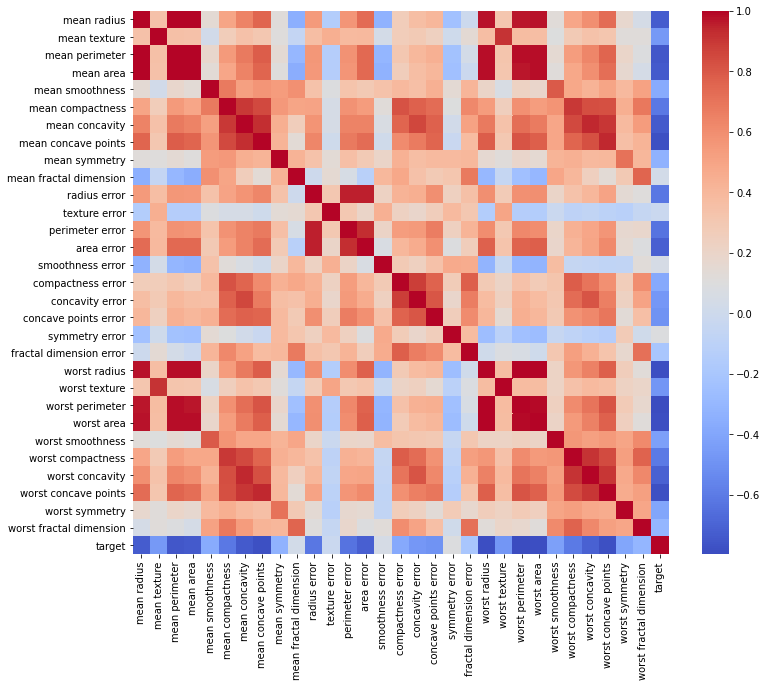

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='coolwarm'
            ) 

graficando algunas correlaciones

se puede observar que muchas de ellas dan exlentes correlaciones por su pendiente , podemos ver ademas con este tipo de grafica la distribuccion de cada clase de tumor dentro de cada correlacion y observar que hay un contraste alto entre como se ubica cada tumor en la grafica.

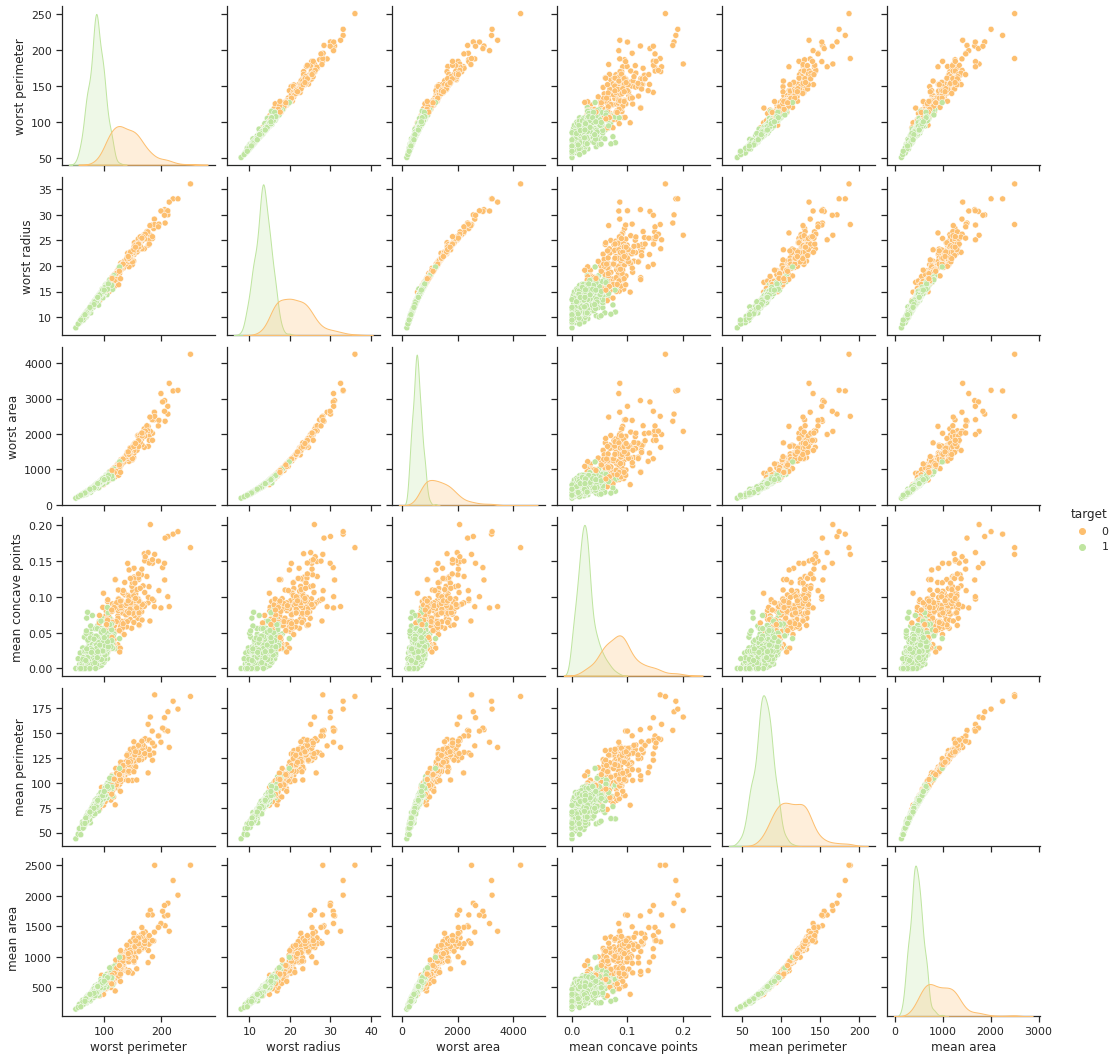

In [26]:
nuevo=df[['target','worst perimeter','worst radius','worst area','mean concave points','mean perimeter','mean area']]
sns.set(style='ticks',color_codes=True)
g=sns.pairplot(nuevo,hue='target',palette='Spectral')

# <a id='1'>4.  DIVISION DE DATOS </a>

In [30]:
x=df.drop(df.columns[[30]], axis='columns')


In [36]:
y=df[['target']]



In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=42)

In [40]:
y_train.shape

(455, 1)

# <a id='1'>5.MODELO </a>

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
pred=rf.predict(x_test)
pred.shape

(114,)

In [49]:
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)
print(x_train.shape)

(455, 1)
(114, 1)
(114, 30)
(455, 30)


en el accuaracy se puede notar que tuvo precision alta al comparar con datos que no habia visto antes.

In [53]:
from  sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred)
print(acc)

0.9649122807017544


la matriz de confusion nos dice que tenemos 40 ceros que  acerta bien y 70 1 que acerta bien 

In [55]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred)
print(cm)

[[40  3]
 [ 1 70]]


aqui en la validacion cruzada tambien nos entrega un score solo que aqui ya esta tomando todos los datos.

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf, x_train, y_train, cv=3, scoring="accuracy")
print(cross_val_score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


<function cross_val_score at 0x7f45c3d25158>


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


<function cross_val_score at 0x7f45c3d25158>
